In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('green_tech_data.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [11]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [10]:
df.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


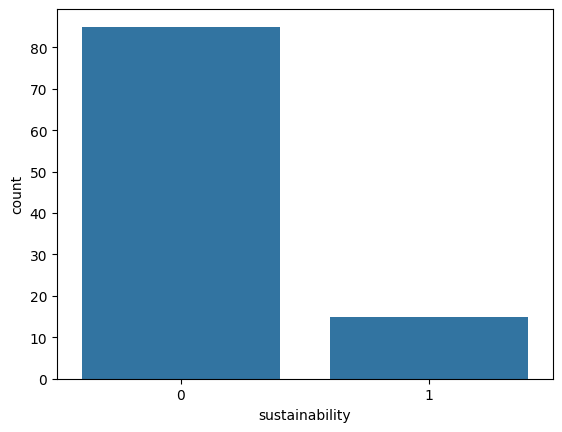

In [14]:
sns.countplot(x='sustainability', data=df)
plt.show()

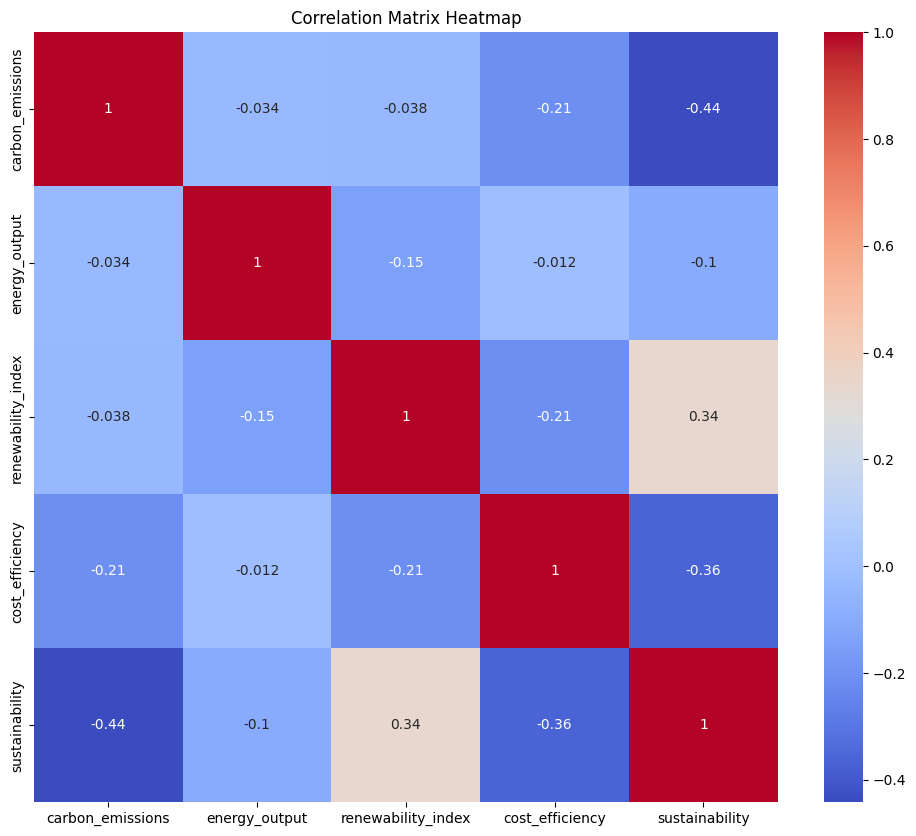

In [19]:
# prompt: make heat map

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
x = df[[	'carbon_emissions',	'energy_output',	'renewability_index',	'cost_efficiency']]
y = df['sustainability']

In [25]:
x_train, x_test, y_train , y_test = train_test_split(x, y, random_state=42)

In [32]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.60      0.75         5

    accuracy                           0.92        25
   macro avg       0.95      0.80      0.85        25
weighted avg       0.93      0.92      0.91        25

[[20  0]
 [ 2  3]]


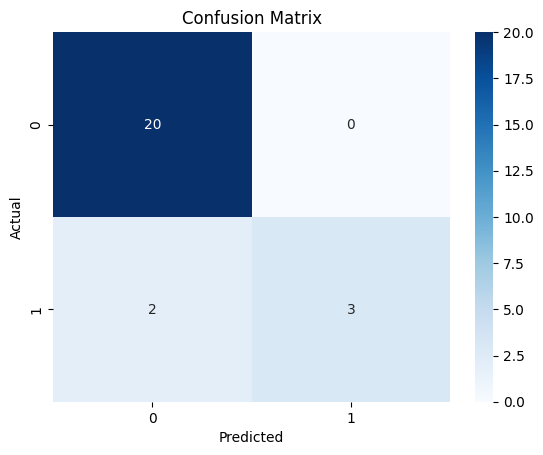

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
print(classification_report(y_test, y_pred, target_names = ['Non Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Non Sustainable       0.91      1.00      0.95        20
    Sustainable       1.00      0.60      0.75         5

       accuracy                           0.92        25
      macro avg       0.95      0.80      0.85        25
   weighted avg       0.93      0.92      0.91        25



In [34]:
coefficients = pd.DataFrame(model.coef_.T, index=x.columns, columns=['Coefficient'])
coefficients

,Coefficient
carbon_emissions,-0.022199
energy_output,0.000539
renewability_index,0.863616
cost_efficiency,-1.252667


In [35]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']